In [1]:
# libraries to import Wikipedia data
import json

# libraries to create DataFrames
import pandas as pd

# libraries to convert data types
import numpy as np

# libraries for regular expressions aka REGEX
import re

# Grab the Data

In [2]:
file_dir = 'Data/'
f'{file_dir}wikipedia-movies.json'

'Data/wikipedia-movies.json'

In [3]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [4]:
len(wiki_movies_raw)

7311

In [5]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [6]:
# First 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [7]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
kaggle_metadata_df = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings_df = pd.read_csv(f'{file_dir}ratings.csv')

In [9]:
kaggle_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [11]:
# Selects randomly 5 rows to look at
kaggle_metadata_df.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
16440,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,51362,tt0012570,en,The Play House,"The opening scene, a dream sequence prior to t...",...,1921-10-26,0.0,22.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Play House,False,6.9,22.0
42331,False,NaN,3000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,192210,tt1922679,en,Open Road,"Angie, a young Brazilian artist, abandons her ...",...,2013-04-12,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Open Road,False,5.2,18.0
38991,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",NaN,107104,tt0092648,en,Beyond the Rising Moon,An alien spaceship is being sought by various ...,...,1988-05-14,0.0,84.0,[],Released,NaN,Beyond the Rising Moon,False,6.0,2.0
20600,False,NaN,0,"[{'id': 10769, 'name': 'Foreign'}, {'id': 878,...",NaN,62301,tt0228457,en,Jigoku no banken: kerubersu,Detective Kouichi Todome -- head of the elite ...,...,1991-12-31,0.0,99.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",NaN,NaN,Stray Dog: Kerberos Panzer Cops,False,6.3,6.0
8467,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,43439,tt0041855,en,The Secret Garden,"When Cholera takes the parents of Mary Lennox,...",...,1949-04-30,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Key to the Most Unusual Picture of the Year,The Secret Garden,False,6.7,3.0


In [12]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
6593,https://en.wikipedia.org/wiki/The_Road_Within,2015.0,https://www.imdb.com/title/tt2962876/,The Road Within,Gren Wells,"[Bradley Gallo, Michael Helfant, Robert Stein,...",NaN,NaN,NaN,"[Robert Sheehan, Dev Patel, Zoë Kravitz, Rober...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577,https://en.wikipedia.org/wiki/The_Yes_Men_(film),2003.0,https://www.imdb.com/title/tt0379593/,The Yes Men,"[Dan Ollman, Sarah Price, Chris Smith]","[Sarah Price, Doug Ruschhaupt, Randy Russell, ...",NaN,NaN,NaN,"[Mike Bonanno, Andy Bichlbaum]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3953,https://en.wikipedia.org/wiki/Lords_of_Dogtown,2005.0,https://www.imdb.com/title/tt0355702/,Lords of Dogtown,Catherine Hardwicke,John Linson,NaN,NaN,NaN,"[Heath Ledger, Emile Hirsch, John Robinson, Vi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
813,https://en.wikipedia.org/wiki/Much_Ado_About_N...,1993.0,https://www.imdb.com/title/tt0107616/,Much Ado About Nothing,Kenneth Branagh,"[Kenneth Branagh, Stephen Evans, David Parfitt]",Kenneth Branagh,NaN,"[Much Ado About Nothing, by, William Shakespeare]","[Kenneth Branagh, Michael Keaton, Robert Sean ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4064,https://en.wikipedia.org/wiki/Al_Franken:_God_...,2006.0,https://www.imdb.com/title/tt0799916/,Al Franken: God Spoke,"[Nick Doob, Chris Hegedus]","[Rebecca Marshall, Frazer Pennebaker]",NaN,NaN,NaN,Al Franken,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [14]:
# conditional statement with list comprehension
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [15]:
wiki_movies_df = pd.DataFrame(wiki_movies)
len(wiki_movies_df.columns.tolist())

78

# Get Only Movies Not Shows

In [16]:
# let's add getting rid of TV shows, we only want movies
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

# Clean Movie for language designations

In [17]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [18]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [19]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [20]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

In [21]:
# Alternate title data
# Correct! Here is a complete list of columns that hold alternate title data: 
# Also known as, Arabic, Cantonese, Chinese, French, Hangul, Hebrew, Hepburn, Japanese, 
# Literally,  Mandarin, McCune–Reischauer, Original title, Polish,  Revised Romanization, 
# Romanized, Russian, Simplified, Traditional, Yiddish

In [22]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [23]:
# this is a Regular Expression aka "regex". This '(tt\d{7})' is a string of characters that define a search pattern
# "(tt\d{7})" — The parentheses marks say to look for one group of text.
# "(tt\d{7})" — The "tt" in the string simply says to match two lowercase Ts.
# "(tt\d{7})" — The "\d" says to match a numerical digit.
# "(tt\d{7})" — The "{7}" says to match the last thing (numerical digits) exactly seven times.
# We want to tell Python to treat our regular expression characters as a raw string of text. 
# Therefore, we put an r before the quotes
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,McCune–Reischauer,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [24]:
# check if column is null using a list comprehension
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [25]:
# Make a list of columns that have less than 90% null data, we want to keep these columns
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [26]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [27]:
len(wiki_movies_df.columns)

21

In [28]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [29]:
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


# Extract and Clean Box Office Data

In [30]:
box_office = wiki_movies_df['Box office'].dropna()
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [31]:
def is_not_a_string(x):
    return type(x) != str

In [32]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [33]:
# lambda x: type(x) != str is the lambda function version of is_not_a_string()
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [34]:
some_list = ['One','Two','Three']
'Mississippi'.join(some_list)

'OneMississippiTwoMississippiThree'

In [35]:
# There's still a lot of data that are stored as list like Item # 54 is "[$6,698,361 (, United States, ), [2]]". 
# We need to concatenated these items into a string, therefore, you can use join() 

box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

#prints out the rows I want to see
box_office[54]

'$6,698,361 ( United States ) [2]'

In [36]:
box_office[6980]

'$99.6 million [4] [5]'

In [37]:
#FORM ONE
# Need dollar sign, but we need to escape it with a slach
# Add \d for any digit from 0 to 9, add a "+" modifier to capture more than one digit
# Add a decimal point, but need to escape that, plus add a question mark modifier to allow 0 or time occurence (making it optional)
# Add more \d digits with an asterisk to indicate zero or more digits
# Add a space, but need to escape, may or may not need using asterisk
# Add that you can use [m]illion or [b]illion
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [38]:
# FORM TWO
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [39]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

# this will throw an error! the ~ tilde symbol is for "similar or "Not"
# this shows you the entries that do not fit either form
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [40]:
# Let's fix our forms to include more of what didn't fit before
# Previous form_one = r'\$\d+\.?\d*\s*[mb]illion'
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'

# sometimes people mispell "milion"
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

#Previous form_two = r'\$\d{1,3}(?:,\d{3})+'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

# The results will also match values like 1.234 billion, but we're trying to change raw numbers 
# like $123.456.789. We don't want to capture any values like 1.234 billion, so we need to add a 
# negative lookahead group that looks ahead for "million" or "billion" after the number and rejects 
# the match if it finds those strings. Don't forget the space! The new form should look like this:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [41]:
# Some values are a range so we are going to replace the end of the range with the first
# example item 3088 did that
box_office[3088]
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

# not item 3088 is different
box_office[3088]

'$33.1 million [1]'

In [42]:
# not we need to extract everything that fits form one or form two, but extract but we need to use both forms
# extract returns a DataFrame
box_office.str.extract(f'({form_one}|{form_two})')
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

In [43]:
# Now let's create a function that turns the extracted values into acceptable numeric values
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
            
        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)
        
        # return value
        return value
        
    # otherwise, return NaN
    else:
        return np.nan

In [44]:
#extract values from box_office and apply the above function to the first column
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', 
                                                      flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [45]:
# removing the old messed "Box Office" column since it's replaced with the clean "box_office" column
# Had to comment it out since I already removed it
#wiki_movies_df.drop('Box office', axis=1, inplace=True)

# Extract and Clean Budget Data

In [46]:
# pull non null data
budget = wiki_movies_df['Budget'].dropna()

In [47]:
# turn list data into string by combining them
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [48]:
#remove any values between a dollar sign and a hyphen (for budgets given in ranges):
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [49]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
#budget = budget.str.replace(r'\[\d+\]\s*', '')

# this will throw an error! the ~ tilde symbol is for "similar or "Not"
# this shows you the entries that do not fit either form
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [50]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\alice.hayden\AppData\Local\Temp\ipykernel_26876\3746335845.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [51]:
# that has a problem
budget[5687]

'$ dead link]'

In [52]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [53]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

# Parse Release Date

In [54]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [55]:
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7071     December 25, 2018 ( 2018-12-25 ) (United States)
7072    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7073    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7074    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7075                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7001, dtype: object

In [56]:
# matches the month, dd, yyyy format
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'

# matches these two formats, for example: yyyy-mm-dd and yyyy/mm/dd
date_form_two = r'\d{4}.[01]\d.[0123]\d'

# matches month yyyy
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'

# matches yyyy
date_form_four = r'\d{4}'

In [57]:
# Since there are different date formats, set the infer_datetime_format 
#option to True. The date formats we've targeted are among those that the to_datetime() 
#function can recognize, which explains the infer_datetime_format=True argument belo

wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(
    f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

# Parse the Running Time

In [58]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [59]:
# This is the good data
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [60]:
# This is the bad data
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [61]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [62]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [63]:
running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6891

In [64]:
running_time[running_time.str.contains(r'\d*\s*m', flags=re.IGNORECASE, na=False) != True]

1347    25 : 03
1551     varies
3925    4 hours
Name: Running time, dtype: object

In [65]:
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [66]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [67]:
# Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values. 
#Because we may have captured empty strings, we'll use the to_numeric() method and set the errors 
#argument to 'coerce'. Coercing the errors will turn the empty strings into Not a Number (NaN), 
#then we can use fillna() to change all the NaNs to zeros.

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [68]:
# Now we can apply a function that will convert the hour capture groups and minute capture groups to 
# minutes if the pure minutes capture group is zero, and save the output to wiki_movies_df

wiki_movies_df['running_time'] = running_time_extract.apply(
    lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [69]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

# Clean Kaggle Data

In [70]:
kaggle_metadata_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [71]:
kaggle_metadata_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [72]:
kaggle_metadata_df['popularity']

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45466, dtype: object

In [73]:
kaggle_metadata_df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [75]:
kaggle_metadata_df[~kaggle_metadata_df['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
kaggle_metadata_df = kaggle_metadata_df[kaggle_metadata_df['adult'] == 'False'].drop('adult',axis='columns')

In [79]:
kaggle_metadata_df['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [81]:
kaggle_metadata_df['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [82]:
kaggle_metadata_df['video'] = kaggle_metadata_df['video'] == 'True'

In [84]:
kaggle_metadata_df['budget'] = kaggle_metadata_df['budget'].astype(int)
kaggle_metadata_df['id'] = pd.to_numeric(kaggle_metadata_df['id'], errors='raise')
kaggle_metadata_df['popularity'] = pd.to_numeric(kaggle_metadata_df['popularity'], errors='raise')

In [85]:
kaggle_metadata_df['release_date'] = pd.to_datetime(kaggle_metadata_df['release_date'])

# Checks on the Ratings Data

In [87]:
ratings_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


C:\Users\alice.hayden\AppData\Local\Temp\ipykernel_26876\1155278836.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings_df.info(null_counts=True)


In [88]:
pd.to_datetime(ratings_df['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [89]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

In [90]:
ratings_df.describe()

,userId,movieId,rating
count,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00
std,7.817620e+04,3.108526e+04,1.065443e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,6.716400e+04,1.073000e+03,3.000000e+00
50%,1.351630e+05,2.583000e+03,3.500000e+00
75%,2.026930e+05,6.503000e+03,4.000000e+00
max,2.708960e+05,1.762750e+05,5.000000e+00


count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

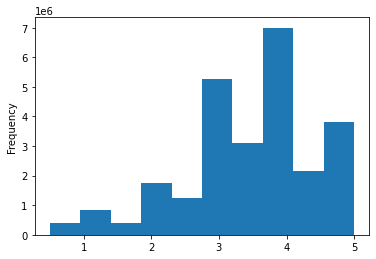

In [92]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings_df['rating'].plot(kind='hist')
ratings_df['rating'].describe()